In [1]:
import requests
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
url = "http://books.toscrape.com/"

# This is where we do an HTTP request to get the HTML from the website
response = requests.get(url)

# And this is where we feed that HTML to the parser
soup = BeautifulSoup(response.content, "html.parser")

In [5]:
type(soup)

bs4.BeautifulSoup

In [6]:
books_html = soup.find_all("article", class_="product_pod")
len(books_html)

20

## Parsing _one_ book

In [7]:
books_html[0]

<article class="product_pod">
<div class="image_container">
<a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
</div>
<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
<div class="product_price">
<p class="price_color">£51.77</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>
</article>

In [8]:
type(books_html[0])

bs4.element.Tag

In [9]:
book_title=books_html[0].find("h3").find("a")
book_title

<a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a>

In [11]:
book_title=books_html[0].find("h3").find("a").attrs["title"]
book_title

'A Light in the Attic'

In [17]:
book_price = float(books_html[0].find("div",class_="product_price").find("p",class_="price_color").string[1:])
book_price

51.77

In [28]:
book_stars_html = books_html[0].find("p", class_="star-rating")
book_stars_html

<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>

In [29]:
book_stars_html.attrs['class']

['star-rating', 'Three']

In [30]:
def parse_rating(rating_classes):
    ratings = {'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5}
    for rating in ratings:
        if rating in rating_classes:
            return ratings[rating]

In [32]:
book_rating = parse_rating(books_html[0].find("p", class_="star-rating").attrs['class'])
book_rating

3

## Parsing _all_ books

In [33]:
books_dict = { 'Title': [], 'Price': [], 'Rating': [] }

In [34]:
for book in books_html:
    title = book.find("h3").find("a").attrs["title"]
    price = float(book.find("p", class_="price_color").text[1:])
    rating = parse_rating(book.find("p", class_="star-rating").attrs['class'])
    books_dict["Title"].append(title)
    books_dict["Price"].append(price)
    books_dict["Rating"].append(rating)

In [35]:
books_dict

{'Title': ['A Light in the Attic',
  'Tipping the Velvet',
  'Soumission',
  'Sharp Objects',
  'Sapiens: A Brief History of Humankind',
  'The Requiem Red',
  'The Dirty Little Secrets of Getting Your Dream Job',
  'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull',
  'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics',
  'The Black Maria',
  'Starving Hearts (Triangular Trade Trilogy, #1)',
  "Shakespeare's Sonnets",
  'Set Me Free',
  "Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)",
  'Rip it Up and Start Again',
  'Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991',
  'Olio',
  'Mesaerion: The Best Science Fiction Stories 1800-1849',
  'Libertarianism for Beginners',
  "It's Only the Himalayas"],
 'Price': [51.77,
  53.74,
  50.1,
  47.82,
  54.23,
  22.65,
  33.34,
  17.93,
  22.6,
  52.15,
  13.99,
  20.66,
  17.46,
  52.29,
  35.02,
  57.25,
  23.88,
  3

In [36]:
len(books_dict)

3

In [37]:
len(books_dict["Title"])

20

In [38]:
books_df = pd.DataFrame(books_dict)
books_df

,Title,Price,Rating
0,A Light in the Attic,51.77,3
1,Tipping the Velvet,53.74,1
2,Soumission,50.10,1
3,Sharp Objects,47.82,4
4,Sapiens: A Brief History of Humankind,54.23,5
5,The Requiem Red,22.65,1
6,The Dirty Little Secrets of Getting Your Dream...,33.34,4
7,The Coming Woman: A Novel Based on the Life of...,17.93,3
8,The Boys in the Boat: Nine Americans and Their...,22.60,4
9,The Black Maria,52.15,1


<Axes: xlabel='Rating'>

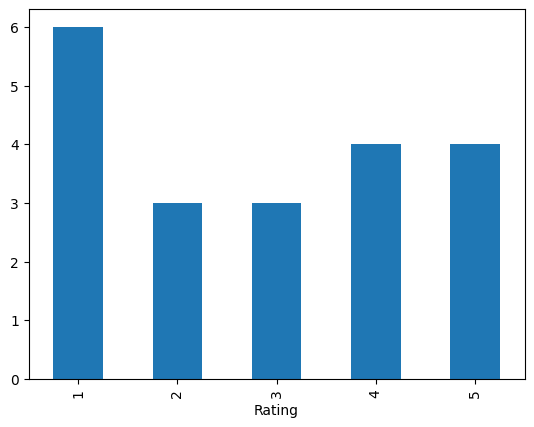

In [39]:
books_df.groupby("Rating").count()["Title"].plot(kind="bar")

In [40]:
from nbresult import ChallengeResult

result = ChallengeResult('books',
    columns=books_df.columns,
    title=str(books_df.loc[0,'Title']),
    price=books_df.loc[0,'Price'],
    rating=books_df.loc[0,'Rating']
)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /Users/aybukealtuntas/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /Users/aybukealtuntas/data-book-scraping/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 5 items

test_books.py::TestBooks::test_books_df_columns_name PASSED              [ 20%]
test_books.py::TestBooks::test_books_df_columns_size PASSED              [ 40%]
test_books.py::TestBooks::test_first_book_price PASSED                   [ 60%]
test_books.py::TestBooks::test_first_book_rating PASSED                  [ 80%]
test_books.py::TestBooks::test_first_book_title PASSED                   [100%]

============================== 5 passed in 0.48s ===============================


💯 You can commit your code:

git add tests/books.pickle

git commit -m 'Completed books step'

git push origin master



## Iterating Over All Catalog Pages


In [41]:
MAX_PAGE = 3
for page in range(1, MAX_PAGE + 1):
    url = f"http://books.toscrape.com/catalogue/page-{page}.html"
    print(url)

http://books.toscrape.com/catalogue/page-1.html
http://books.toscrape.com/catalogue/page-2.html
http://books.toscrape.com/catalogue/page-3.html


In [42]:
all_books_dict = { 'Title': [], 'Price': [], 'Rating': [] }

MAX_PAGE = 50
for page in range(1, MAX_PAGE + 1):
    print(f"Parsing page {page}...")
    url = f"http://books.toscrape.com/catalogue/page-{page}.html"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")

    for book in soup.find_all("article", class_="product_pod"):
        title = book.find("h3").find("a").attrs["title"]
        price = float(book.find("p", class_="price_color").text[1:])
        rating = parse_rating(book.find("p", class_="star-rating").attrs["class"])
        all_books_dict["Title"].append(title)
        all_books_dict["Price"].append(price)
        all_books_dict["Rating"].append(rating)

print("Done!")

Parsing page 1...
Parsing page 2...
Parsing page 3...
Parsing page 4...
Parsing page 5...
Parsing page 6...
Parsing page 7...
Parsing page 8...
Parsing page 9...
Parsing page 10...
Parsing page 11...
Parsing page 12...
Parsing page 13...
Parsing page 14...
Parsing page 15...
Parsing page 16...
Parsing page 17...
Parsing page 18...
Parsing page 19...
Parsing page 20...
Parsing page 21...
Parsing page 22...
Parsing page 23...
Parsing page 24...
Parsing page 25...
Parsing page 26...
Parsing page 27...
Parsing page 28...
Parsing page 29...
Parsing page 30...
Parsing page 31...
Parsing page 32...
Parsing page 33...
Parsing page 34...
Parsing page 35...
Parsing page 36...
Parsing page 37...
Parsing page 38...
Parsing page 39...
Parsing page 40...
Parsing page 41...
Parsing page 42...
Parsing page 43...
Parsing page 44...
Parsing page 45...
Parsing page 46...
Parsing page 47...
Parsing page 48...
Parsing page 49...
Parsing page 50...
Done!


In [43]:
len(all_books_dict["Title"])

1000

In [44]:
all_books_df = pd.DataFrame.from_dict(all_books_dict)
all_books_df.tail()

,Title,Price,Rating
995,Alice in Wonderland (Alice's Adventures in Won...,55.53,1
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",57.06,4
997,A Spy's Devotion (The Regency Spies of London #1),16.97,5
998,1st to Die (Women's Murder Club #1),53.98,1
999,"1,000 Places to See Before You Die",26.08,5


<Axes: >

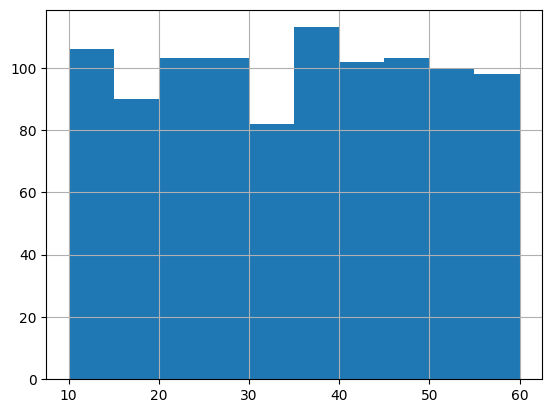

In [45]:
all_books_df["Price"].hist()

<Axes: xlabel='Rating'>

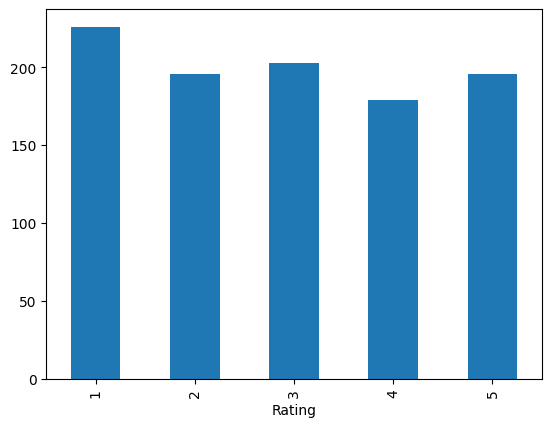

In [46]:
all_books_df.groupby("Rating").count()["Title"].plot(kind="bar")

In [47]:
all_books_df.to_csv("books.csv")

## Refactoring

In [57]:
import requests
import pandas as pd
from bs4 import BeautifulSoup


def fetch_page(page):
    url = f"http://books.toscrape.com/catalogue/page-{page}.html"
    response = requests.get(url)
    response.raise_for_status()
    return BeautifulSoup(response.content, "html.parser")


def add_books_to_dict(soup, books_dict):
    for book in soup.find_all("article", class_="product_pod"):
        title = book.find("h3").find("a")["title"]
        price = float(book.find("p", class_="price_color").text[1:])
        rating = parse_rating(book.find("p", class_="star-rating")["class"])

        books_dict["Title"].append(title)
        books_dict["Price"].append(price)
        books_dict["Rating"].append(rating)


def create_books_df(max_page):
    books_dict = {'Title': [], 'Price': [], 'Rating': []}

    for page in range(1, max_page + 1):
        print(f"Parsing page {page}...")
        soup = fetch_page(page)
        add_books_to_dict(soup, books_dict)

    return pd.DataFrame(books_dict)


In [58]:
df = create_books_df(50)


Parsing page 1...
Parsing page 2...
Parsing page 3...
Parsing page 4...
Parsing page 5...
Parsing page 6...
Parsing page 7...
Parsing page 8...
Parsing page 9...
Parsing page 10...
Parsing page 11...
Parsing page 12...
Parsing page 13...
Parsing page 14...
Parsing page 15...
Parsing page 16...
Parsing page 17...
Parsing page 18...
Parsing page 19...
Parsing page 20...
Parsing page 21...
Parsing page 22...
Parsing page 23...
Parsing page 24...
Parsing page 25...
Parsing page 26...
Parsing page 27...
Parsing page 28...
Parsing page 29...
Parsing page 30...
Parsing page 31...
Parsing page 32...
Parsing page 33...
Parsing page 34...
Parsing page 35...
Parsing page 36...
Parsing page 37...
Parsing page 38...
Parsing page 39...
Parsing page 40...
Parsing page 41...
Parsing page 42...
Parsing page 43...
Parsing page 44...
Parsing page 45...
Parsing page 46...
Parsing page 47...
Parsing page 48...
Parsing page 49...
Parsing page 50...


In [59]:
df

,Title,Price,Rating
0,A Light in the Attic,51.77,3
1,Tipping the Velvet,53.74,1
2,Soumission,50.10,1
3,Sharp Objects,47.82,4
4,Sapiens: A Brief History of Humankind,54.23,5
...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,55.53,1
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",57.06,4
997,A Spy's Devotion (The Regency Spies of London #1),16.97,5
998,1st to Die (Women's Murder Club #1),53.98,1
